# **Trabajo Practico 1: Modelos Predictivos**

*Lorenzo Nascimbene & Federico Zafran*


# Importacion de Librerias


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Punto 1:
Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

In [11]:
Bangalore_df = pd.read_csv("Bangalore.csv")

In [12]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [13]:
Bangalore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


Elegimos este dataset, el cual cuenta con ls requisitos. Tiene mas de 5 atributos numéricos y 1 categórico.También cuenta con mas de 1000 y menos de 10000 muestras.

Vamos a predecir el precio.

In [14]:
Bangalore_df = Bangalore_df[["Location", "Price", "Area", "No. of Bedrooms","Gymnasium", "SwimmingPool","24X7Security", "CarParking",]]
Bangalore_df.head()

,Location,Price,Area,No. of Bedrooms,Gymnasium,SwimmingPool,24X7Security,CarParking
0,JP Nagar Phase 1,30000000,3340,4,1,1,1,0
1,Dasarahalli on Tumkur Road,7888000,1045,2,1,1,1,1
2,Kannur on Thanisandra Main Road,4866000,1179,2,1,1,1,0
3,Doddanekundi,8358000,1675,3,0,0,0,0
4,Kengeri,6845000,1670,3,1,1,1,1


# Punto 2:

Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

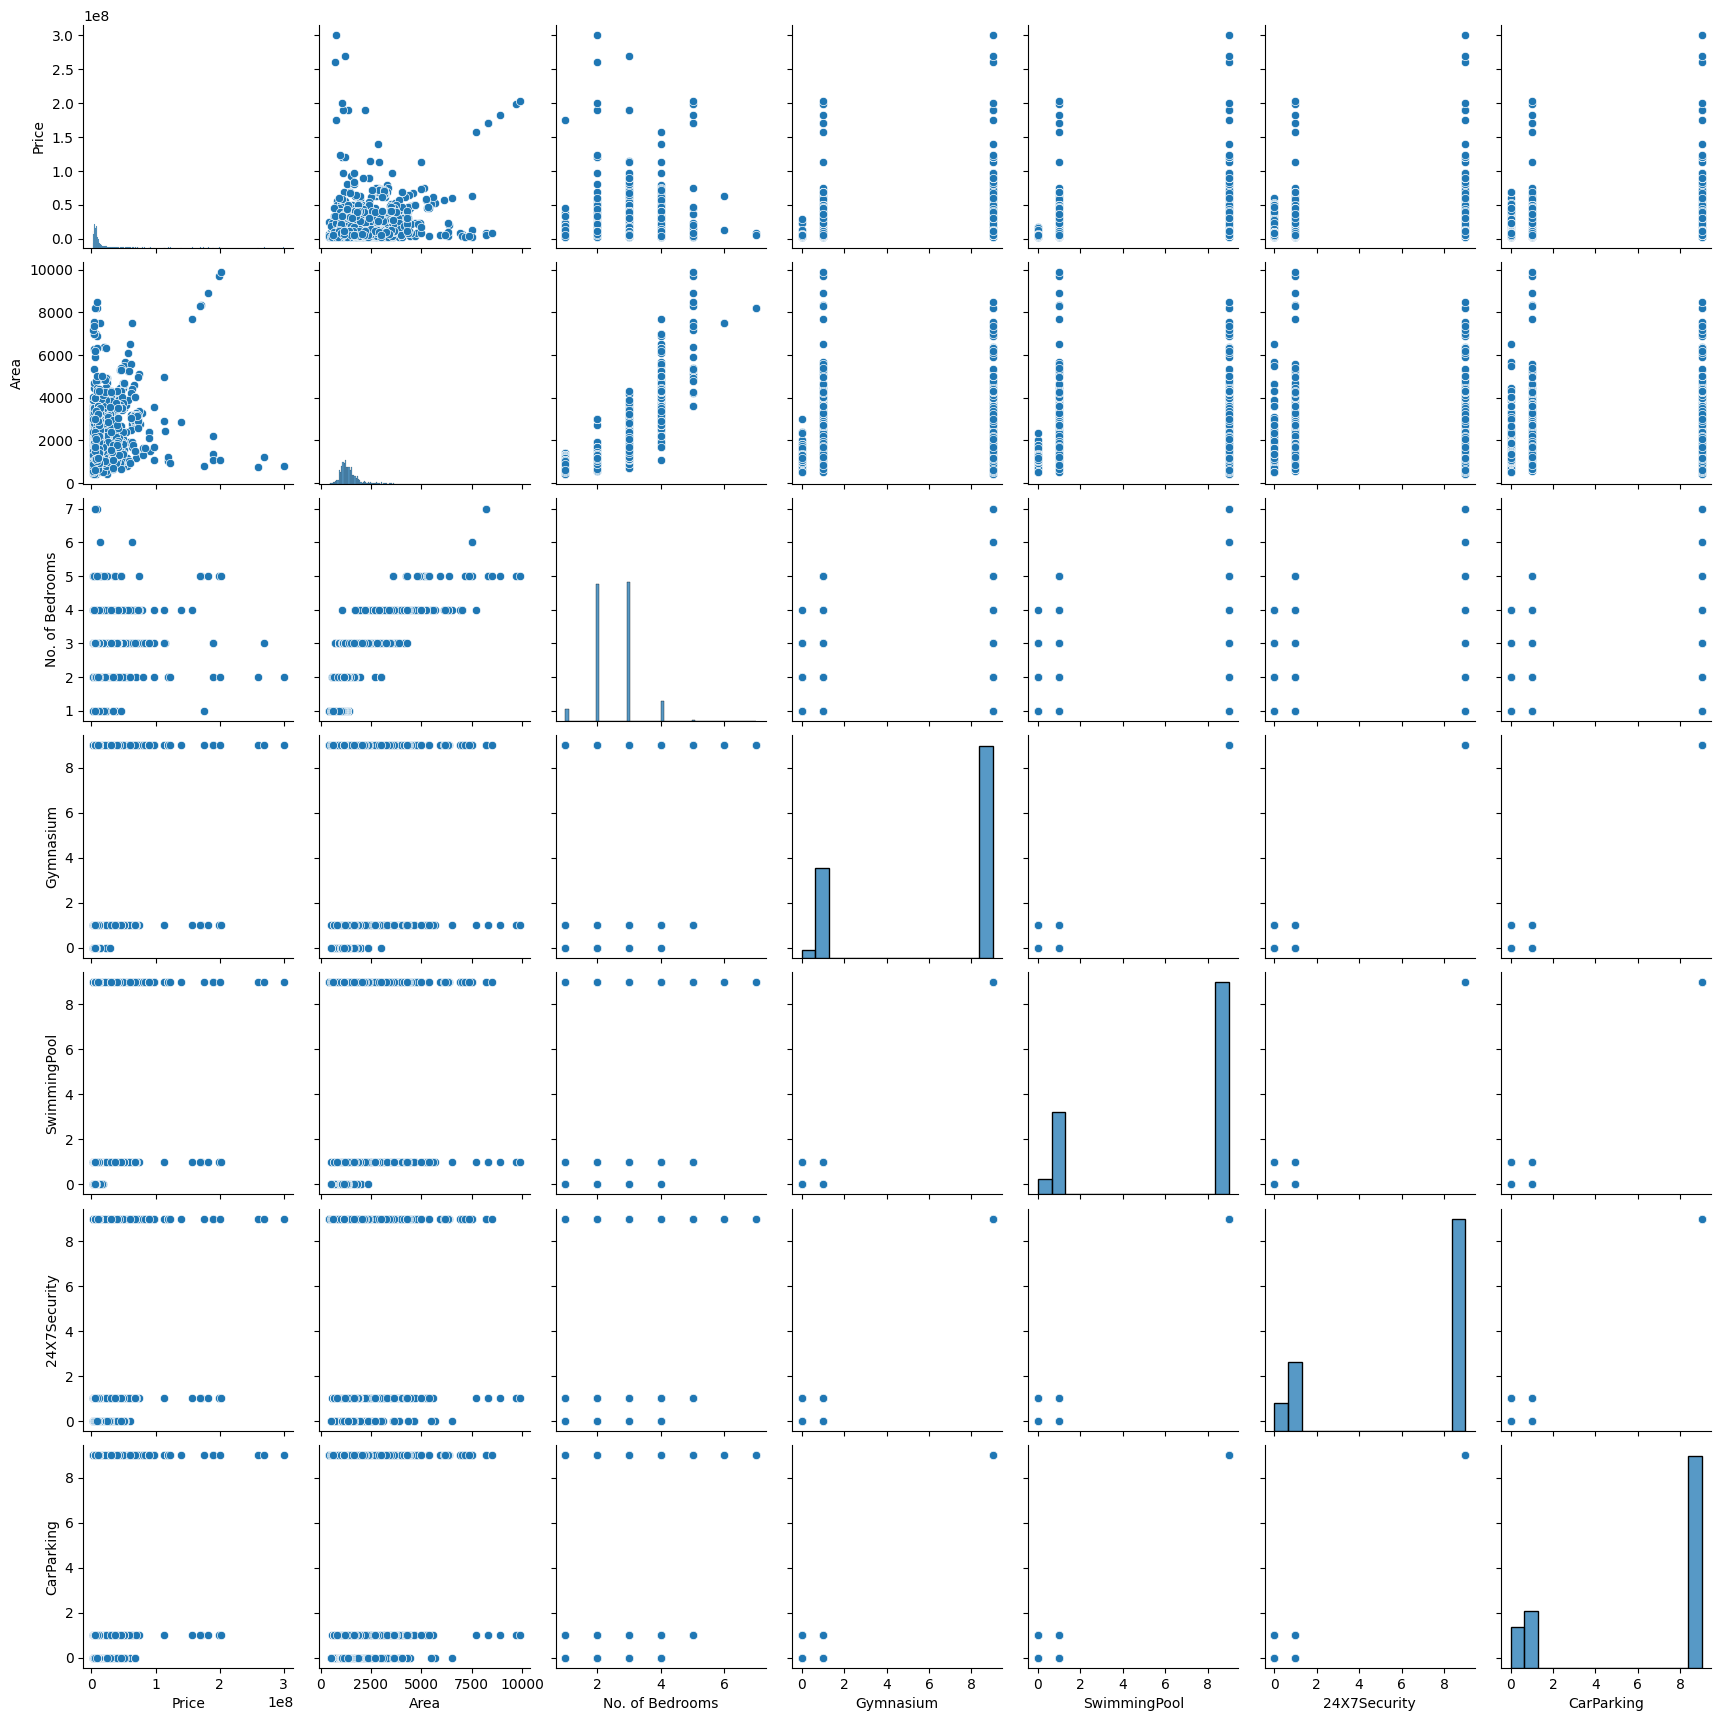

In [15]:
sns.pairplot(Bangalore_df)

En este grafico mostramos las relaciones entre todas las variables numéricas. Cada variable se compara con todas las demás variables en pares, lo que nos va a ayudar a encontrar las relaciones entre las variables.

Text(0.5, 1.0, 'Relación entre Localización y Precio')

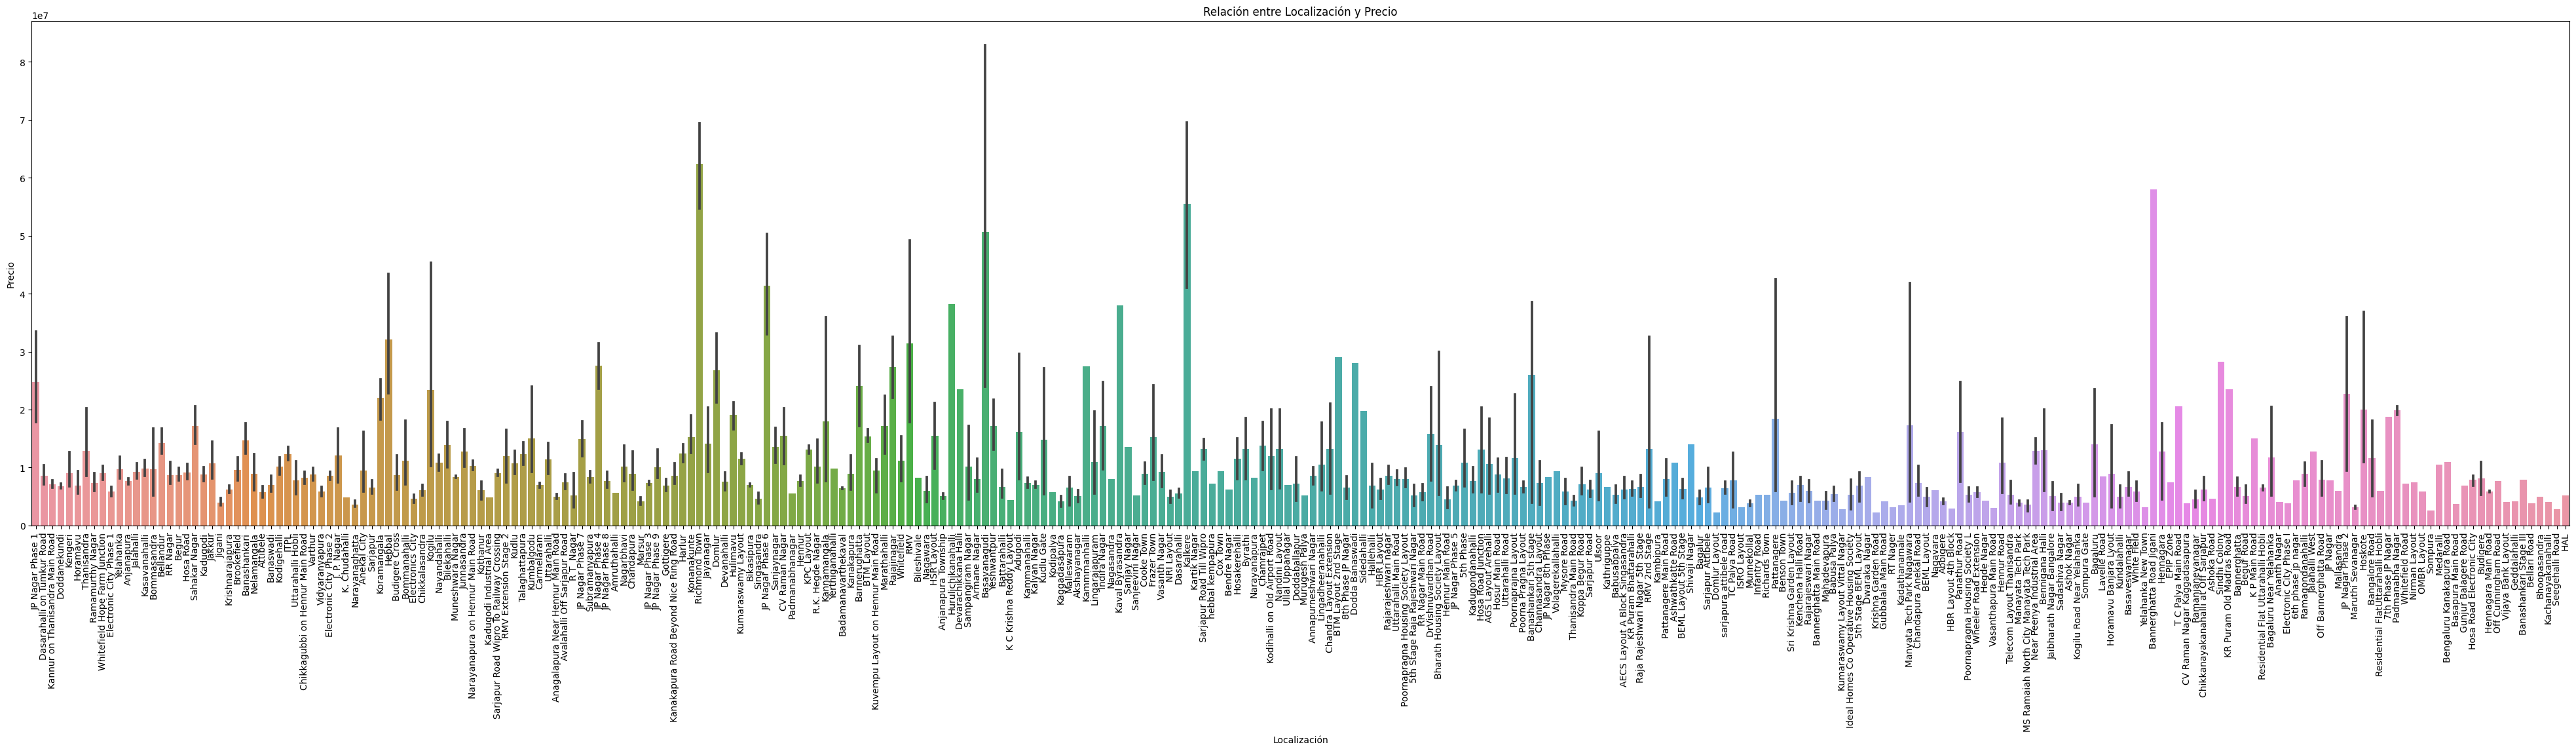

In [16]:
plt.figure(figsize=(50, 10))
sns.barplot(x='Location', y='Price', data=Bangalore_df)
plt.xlabel('Localización')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.title('Relación entre Localización y Precio')

Lo que hacemos aca es ver la relacion del precio con la localizacion del departamento.

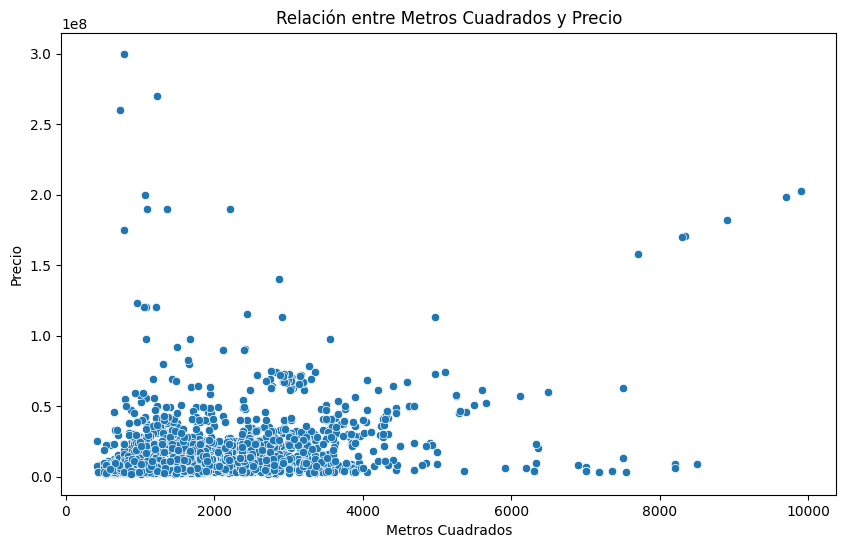

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=Bangalore_df)
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio')
plt.title('Relación entre Metros Cuadrados y Precio')
plt.show()

Lo que muestra este grafico es la relacion entre el Area(mts cuadrados) y el precio. Los puntos no estan alineados ya que el lugar en donde esta ubicado, por ejemplo, el que tiene mas mts cuadrados puede ser mala, alejado de todo, o tambien puede ser por otros factores como puede ser el nr de habitaciones, si tiene garage, etc.

# Punto 3:

Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.



In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

seguimos importando librerías

In [19]:
le = preprocessing.LabelEncoder()

In [20]:
Bangalore_df['Location'] = le.fit_transform(Bangalore_df['Location'])

acá transformamos el atributo cat. a num.

# Punto 4
Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
test, train = train_test_split(Bangalore_df, test_size=0.25)

acá dividimos el df en train y test. 75%train - 25%test

In [23]:
test.head()

,Location,Price,Area,No. of Bedrooms,Gymnasium,SwimmingPool,24X7Security,CarParking
2104,215,3677000,1180,2,9,9,9,9
2734,220,4349000,814,2,9,9,9,9
2859,252,69200000,3300,3,9,9,9,9
2896,64,5610000,935,2,9,9,9,9
1002,49,31800000,2540,4,1,1,0,0


# Punto 5
Para el atributo numérico a predecir seleccionado:

Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.
Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.
Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

Sugerencia: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

Se recomienda utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

In [24]:
from sklearn.linear_model import LinearRegression

Definimos X train, Y train, X test e Y test con la variable numerica a predecir "Price".

In [25]:
X_train = train.drop("Price", axis=1)
y_train = train["Price"]
X_test = test.drop("Price", axis=1)
y_test = test["Price"]
#axis=1 sirve para indicar que queremos eliminar la COLUMNA price y no una fila

Creamos nuestro modelo de Regresion Lineal

In [26]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(reg, X_test,y_test)

array([0.11103419, 0.34099154, 0.08767702, 0.27720186, 0.35940292])

Realizamos la validación cruzada

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_test, y_test, cv=10)

array([-0.08825691,  0.15824119,  0.42517882,  0.16140155, -0.08855238,
        0.0871638 ,  0.23368071, -0.21932895,  0.05324666,  0.51383117])

realizamos otra validacion cruzada con numeros aleatorios

In [31]:
parametros : dict = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 8, 16, 32, 64]
}

seleccionamos los hiperparametros

Arbol de decision

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

Creamos el Arbol de decision

In [33]:
PinoSilvestre : DecisionTreeClassifier = DecisionTreeRegressor()

Buscamos la mejor combinacion de Hiperparametros

In [34]:
RS= RandomizedSearchCV(PinoSilvestre, parametros, cv=5)
RS.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 8, 16, 32,
                                                              64]})

Los mostramos a los mejores Hiperparametros

In [35]:
RS.best_params_

{'min_samples_split': 2, 'max_depth': 2}

Mostramos el resultado que da nuestro modelo

In [36]:
RS.best_score_

0.0628463554599962

Mejor resultado

¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

Respuesta: Para elegir el mejor árbol buscamos hiperparámetros y comparamos su rendimiento. Evaluamos el rendimiento de cada modelo comparando su score y asi encontramos el mejor hiperparámetro y modelo aprovechando la validación cruzada.

# Punto 6
Para el atributo categórico a predecir seleccionado
Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.
Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.
Responder las mismas preguntas que en el punto 5 para este caso.

Definimos X train, Y train, X test e Y test con la variable categorica a predecir "Location".

In [37]:
X_train = train.drop("Location", axis=1)
y_train = train["Location"]
X_test = test.drop("Location", axis=1)
y_test = test["Location"]

In [38]:
from sklearn.linear_model import LogisticRegression 

Creamos nuestro modelo y a contiuacion lo entrenamos

In [39]:
RegresionLogistica = LogisticRegression(random_state=0)
RegresionLogistica.fit(X_train, y_train)

c:\Users\Hogar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [40]:
prediccion_y = RegresionLogistica.predict(X_test)

In [43]:
accuracy = accuracy_score

In [44]:
accuracy : float = accuracy_score(y_test, prediccion_y)
accuracy

0.005585392051557465

Decision Tree Classifier

Definimos variables con los hiperparametros

In [45]:
parametros : dict = {
    "max_depth" : [2,4,8,9],
    "min_samples_split" : [6,12,24,48,96,192],
    "min_samples_leaf" : [6,12,24,48,96,192],
}

Creamos el arbol de decision para predecir la variable categorica

In [46]:
Arb_Dec_Class : DecisionTreeClassifier = DecisionTreeClassifier()

Usamos RandomSearch para buscar la mejor combinacion de parametros para sacarle el mayor rendimiento a nuestro modelo

In [47]:
RS2 : RandomizedSearchCV= RandomizedSearchCV(Arb_Dec_Class,parametros,cv=5)
RS2.fit(X_train,y_train)

c:\Users\Hogar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [2, 4, 8, 9],
                                        'min_samples_leaf': [6, 12, 24, 48, 96,
                                                             192],
                                        'min_samples_split': [6, 12, 24, 48, 96,
                                                              192]})

Y mostramos estos parametros 

In [48]:
RS2.best_params_

{'min_samples_split': 6, 'min_samples_leaf': 24, 'max_depth': 9}

Mostramos el score que nos devuelve nuestro modelo

In [49]:
RS2.best_score_

0.1256342703039104

A continuacion entrenamos nuestro arbol pero sin usar los parametros que nos da el RS

In [50]:
Arb_Dec_Class.fit(X_train,y_train)

DecisionTreeClassifier()

Creamos un modelo con esta combinacion de Hiperparametros

In [51]:
Arb_Dec_Class_best : DecisionTreeClassifier =RS2.best_estimator_

Vemos las predicciones Y para X_test

In [52]:
y_predict = Arb_Dec_Class_best.predict(X_test)

Y nos da un resultado un poco mas bajo que con los parametros recomendados por RS

In [53]:
score : float = accuracy_score(y_test, y_predict)
score

0.14178302900107412

Respuesta: Evaluamos la precisión de la Regresión Logística y del Árbol de Decisión, encontramos el mejor Árbol de Decisión en la busqueda de hiperparámetros y comparamos el rendimiento de los dos modelos.

A diferencia del punto 5, a nustro arbol de decision le va bastante mejor. 

# Punto 7
Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?



El primer metodo de Validacion cruzada que investigamos es el metodo de Validación cruzada estratificada (Stratified cross-validation).

La Validación Cruzada Estratificada es una variante de la validación cruzada k-fold que se utiliza comúnmente en problemas de clasificación cuando tienes conjuntos de datos desequilibrados, es decir, cuando las clases objetivo no están representadas en cantidades iguales.

Las ventajas que encontramos son que es un metodo Adecuado para conjuntos de datos desequilibrados, ya que garantiza que cada pliegue contenga una proporción similar de clases.
tambien Puede mejorar la precisión de la evaluación en problemas de clasificación.

Las Desventaja con la que cuenta este modelo es que puede ser más costoso computacionalmente que la validación cruzada estándar.

![Alt text](image-2.png)

El segundo metodo de validacion cruzada que investigamos es la Validación Cruzada Estratificada en Series Temporales (Stratified Time Series Cross-Validation):

La Validación Cruzada Estratificada en Series Temporales es una variante de la validación cruzada diseñada específicamente para conjuntos de datos de series temporales. A diferencia de la validación cruzada estándar, donde los datos se dividen en pliegues de manera aleatoria, en esta variante se busca mantener la estructura temporal de los datos. 

Las Ventajas de la Validación Cruzada Estratificada en Series Temporales son que es Adecuada para series temporales, Mantiene la estructura temporal de los datos, lo que es esencial en problemas en los que el orden de los datos es crucial, como predecir valores futuros y tambien que Evalúa el rendimiento del modelo de manera realista, Al dividir los datos de manera secuencial, se simula de manera más precisa cómo funcionaría el modelo en la práctica.

Las Desventajas de la Validación Cruzada Estratificada en Series Temporales son que Puede ser complicada de implementar correctamente, ya que es necesario tener en cuenta la estructura temporal y garantizar que los pliegues reflejen adecuadamente la evolución temporal de los datos, tambien puede requerir más tiempo de procesamiento debido a la naturaleza secuencial de la división de los datos.

![Alt text](image-1.png)

# Punto 8 (Conclusion)
Escribir una conclusión sobre el trabajo realizado.



Bueno ya llegando al final de este trabajo podemos llegar a la conclusion general de que no elejimos un buen dataset ya que nuestro atributo categorico a predecir (location / ubicacion de las casas) era totalmente independiente del resto de variables numericas, osea las variables numericas (ambientes, shopping cercanos, etc...) podian tener cualquier valor independientemente de la zona en la que este la casa ya que estas variables estan presentes en todo el mundo, esto tambien viceversa cuando se trata de predecir la variable categorica. esto hizo que nuestros modelos sean muy imprecisos pero nos dejo la enseñansa para proximas ocasiones de elegir mejores dataset donde las variables que querramos predecir varien mucho por los valores que tengan las numericas generando una mayor precision en nuestras predicciones. 

Tambien nos costo bastante investigar sobre los modelos predictivos que teniamos que usar pero indagando bastante en SciKit_Learn, Preguntando a Chat GPT y en distintos lugares, tambien con la ayuda de compañeros mas entendidos en el tema logramos entender y terminar el trabajo.

Queriamos agradecerte Chona por darnos mas plazo de entrega ya que con TIC Experience estabamos bastante justos de tiempo y ya con el evento finalizado pudimos terminar el trabajo en condiciones.